In [3]:
import numpy as np
import DDM_util as util
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
%matplotlib inline

In [4]:
num_individuals = 10
p = 0.5
L = util.create_erdosreyni_graph(num_individuals, p)

In [5]:
num_individuals = 10
x0 = np.zeros([num_individuals, 1])
sigma = np.zeros([num_individuals, 1])
sigma_noise = np.ones([num_individuals, 1]) * 0.1

In [8]:
dt = 0.001
T = 10

def compute_leader_discrepancy(leader_beta, leader_index=5):
    leader_betas = [leader_beta]
    leader_indices = [leader_index]
    beta = util.create_leaderfollower_beta(num_individuals, leader_indices, leader_betas)

    x = util.run_simulation(x0, beta, L, dt, sigma, T)
    return [util.compute_discrepancy(x[:,t], leader_index - 1, L) for t in range(x.shape[1])]

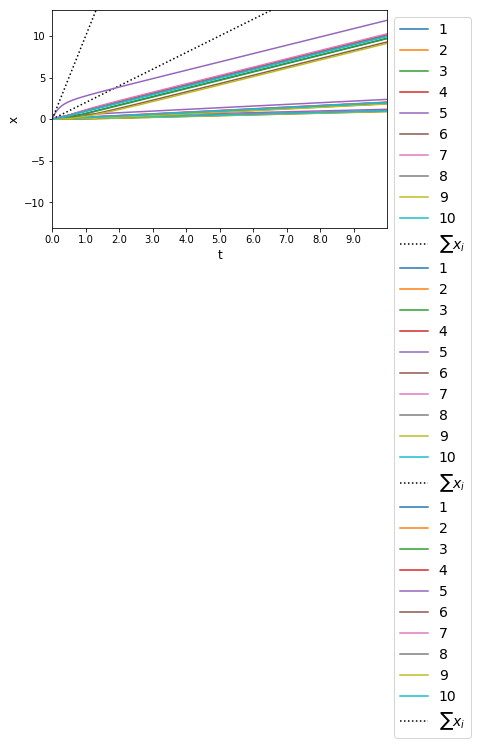

In [9]:
discrepancies_1 = compute_leader_discrepancy(1)
discrepancies_2 = compute_leader_discrepancy(2)
discrepancies_10 = compute_leader_discrepancy(10)

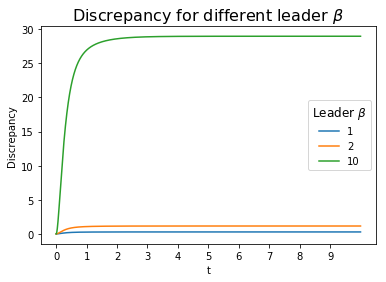

In [12]:
axis_fontsize = 10
title_fontsize = 16
legendtitle_fontsize = 12
legendlabel_fontsize = 10

plt.plot(discrepancies_1, label="1")
plt.plot(discrepancies_2, label="2")
plt.plot(discrepancies_10, label="10")
legend = plt.legend(title=r"Leader $\beta$", fontsize=legendlabel_fontsize)
plt.setp(legend.get_title(),fontsize=legendtitle_fontsize)
plt.title(r'Discrepancy for different leader $\beta$', fontsize=title_fontsize)
plt.ylabel('Discrepancy', fontsize=axis_fontsize)
plt.xlabel('t', fontsize=axis_fontsize)
t_vals = np.arange(0, T, 1)
plt.xticks(range(0, len(discrepancies_1), int(len(discrepancies_1) / T)), t_vals)
plt.savefig('../Figures/oneleader_beta_connected.png', bbox_inches="tight")
plt.show()